In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd

#查看tf 和 keras 的版本
print(tf.__version__)
print(tf.keras.__version__)

2.1.0
2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing
#导入加利福利亚的房价信息

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
# 切分训练集，测试集
from sklearn.model_selection import train_test_split

x_train_all ,x_test ,y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state = 11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_valid_scaler = scaler.fit_transform(x_valid)
x_test_scaler = scaler.fit_transform(x_test)

In [12]:
#多输入
input_wide = keras.layers.Input(shape = [5])
input_deep = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation= 'relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation= 'relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_wide, input_deep], outputs = [output])


model.summary()
model.compile(loss="mean_squared_error", optimizer="adam")
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=0.000001)]

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           210         input_8[0][0]                    
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           930         dense_9[0][0]                    
____________________________________________________________________________________________

In [21]:
x_train_scaler_wide = x_train_scaler[:, :5]
x_train_scaler_deep = x_train_scaler[:, 2:]
x_valid_scaler_wide = x_valid_scaler[:, :5]
x_valid_scaler_deep = x_valid_scaler[:, 2:]
x_test_scaler_wide = x_test_scaler[:, :5]
x_test_scaler_deep = x_test_scaler[:, 2:]


history = model.fit([x_train_scaler_wide, x_train_scaler_deep], y_train,
                    validation_data = ([x_valid_scaler_wide,x_valid_scaler_deep],y_valid),
                    epochs = 100,
                    callbacks = callbacks       
                   )

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3370 - val_loss: 0.4476
Epoch 2/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3296 - val_loss: 0.4197
Epoch 3/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3271 - val_loss: 0.4289
Epoch 4/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3233 - val_loss: 0.4592
Epoch 5/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3258 - val_loss: 0.5026
Epoch 6/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3213 - val_loss: 0.4413
Epoch 7/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3288 - val_loss: 0.4848


In [ ]:
print(history.history)

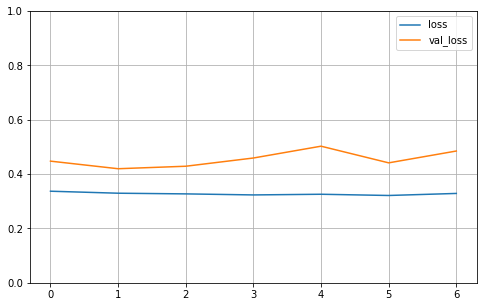

In [22]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [23]:
model.evaluate([x_test_scaler_wide, x_test_scaler_deep], y_test)

5160/5160 [==============================] - 0s 19us/sample - loss: 0.4171


0.41710918790610263